# Importing all the Required Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [15]:
# Read the stock data
df = pd.read_csv('Reliance.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


# Data Preperation

In [17]:
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


# Explanotry variables

In [44]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

x = df[['Open-Close', 'High-Low']]
x.isna().sum()
x = x.ffill()

# Target Variables

In [45]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 1, ..., 1, 0, 0])

# Splitting into training and testing dataset

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
X_train

,Open-Close,High-Low
Date,,
2020-02-13,3.599976,15.150024
2016-04-06,-0.825012,7.049988
2018-05-09,-10.799988,22.049988
2016-04-05,2.200012,10.100006
2019-12-06,-1.900024,26.900024
...,...,...
2016-06-27,-7.575012,8.950012
2017-01-31,0.825012,6.750000
2016-04-12,-3.549988,9.699952


In [48]:
X_test

,Open-Close,High-Low
Date,,
2018-02-12,-12.500000,16.150024
2018-12-10,19.750000,31.200073
2018-10-24,29.150024,44.549927
2019-06-21,16.449951,20.449951
2019-07-19,19.199951,30.250000
...,...,...
2019-08-09,-0.250000,23.199951
2020-01-24,5.449951,17.799927
2019-02-12,-4.900024,20.849976


In [49]:
y_train

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [50]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0])

# Model training

In [51]:
cls = SVC().fit(X_train, y_train)

In [53]:
cls.score(X_test, y_test)

0.5182186234817814

In [55]:
cls.score(X_train, y_train)

0.539553752535497

# Strategy Implementation

In [59]:
df['Predicted_Signal'] = cls.predict(x)
df['Return'] = df.Close.pct_change()

In [60]:
df['Strategy Return'] = df.Return * df.Predicted_Signal.shift(1)

In [61]:
df['Cum_Ret'] = df['Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy Return,Cum_Ret
Date,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,1,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,1,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,1,0.012945,0.012945,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,1,0.007287,0.007287,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,1,0.014626,0.014626,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,0,0.016507,0.000000,1.750897
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,1,-0.041904,-0.000000,1.708994
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,0,-0.008612,-0.008612,1.700382


In [63]:
df['Cum_Strategy'] = df['Strategy Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,1,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,1,0.024945,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,1,0.012945,0.012945,0.037890,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,1,0.007287,0.007287,0.045177,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,1,0.014626,0.014626,0.059804,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,0,0.016507,0.000000,1.750897,1.978729
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,1,-0.041904,-0.000000,1.708994,1.978729
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,0,-0.008612,-0.008612,1.700382,1.970117


# Plot Strategy vs Original Returns

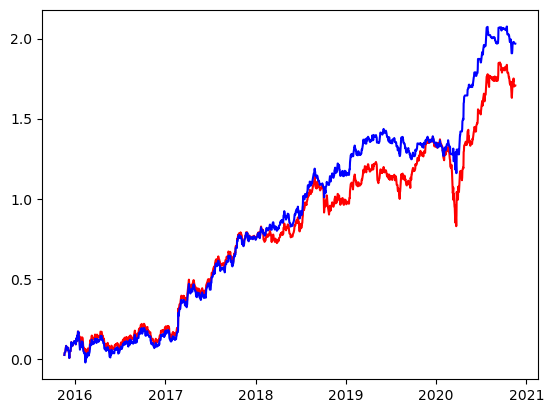

In [64]:
plt.plot(df['Cum_Ret'], color='red')
plt.plot(df['Cum_Strategy'], color='blue')